In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [20]:
import statsmodels.api as sm

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.api import qqplot

In [5]:
#ARMA
data=pd.read_csv(r"D:\Sunspots\Website_Visitors\archive\daily-website-visitors.csv")#loading the dataset

In [7]:
data.drop(columns=["Row","Day.Of.Week"],inplace=True)

In [11]:
data.set_index("Date",inplace=True)

In [24]:
def convert(x):
    y=x.split(",")
    st=""
    for i in y:
        st = st+i
    return int(st)

In [25]:
x=data.index
y=data["First.Time.Visits"].apply(convert)

In [40]:
y

Date
9/14/2014    1430
9/15/2014    2297
9/16/2014    2352
9/17/2014    2327
9/18/2014    2130
             ... 
8/15/2020    1373
8/16/2020    1686
8/17/2020    2181
8/18/2020    2184
8/19/2020    1297
Name: First.Time.Visits, Length: 2167, dtype: int64

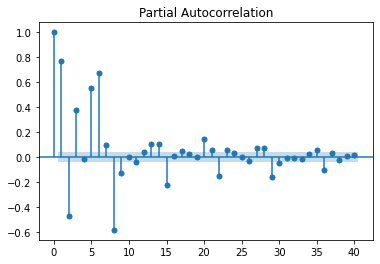

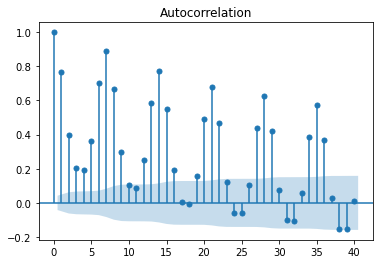

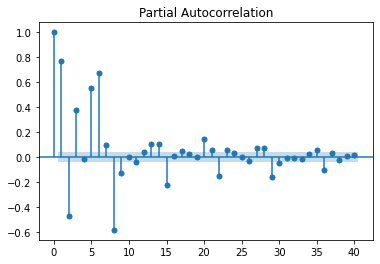

In [28]:
#understanding the data using ACF and PACF plots
sm.graphics.tsa.plot_acf(y,lags=40)
sm.graphics.tsa.plot_pacf(y,lags=40)


In [91]:
df

,First_visits
Date,
9/14/2014,1430
9/15/2014,2297
9/16/2014,2352
9/17/2014,2327
9/18/2014,2130
...,...
8/15/2020,1373
8/16/2020,1686
8/17/2020,2181


In [52]:
arma_20 = ARIMA(df.iloc[:int(0.8*n),:],order=(2,0,0)).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [41]:
df= pd.DataFrame(y.values,columns=["First_visits"],index=x)

In [53]:
print(arma_20.params)

const       2398.982687
ar.L1          1.138879
ar.L2         -0.490799
sigma2    219963.734336
dtype: float64


In [81]:
#Criterions for Accessing a ARIMA Model
def info_content(model):
    print("Akaike Information Criterion :",model.aic)
    print("Schwarz Bayesian Criterion :",model.bic)
    print("Bayesian Information Criteria :",model.hqic)

In [71]:
predictions=arma_20.predict(start="6/14/2019",end="8/19/2020")

In [59]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error

In [72]:
def evaluate(pred,act):
    print("Absolute Error of the arma model :", mean_absolute_error(pred,act))
    print("Root Squared Error of the arma model :", np.sqrt(mean_squared_error(pred,act)))

In [73]:
evaluate(predictions,df.iloc[int(0.8*n):n-1,:])

Absolute Error of the arma model : 646.6698210863603
Root Squared Error of the arma model : 807.2666742367974


In [77]:
#ARIMA (3,0,0)
arima_30=ARIMA(df.iloc[:int(0.8*n),:],order=(3,0,0)).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [78]:
predictions_30=arima_30.predict(start="6/14/2019",end="8/19/2020")

In [79]:
evaluate(predictions_30,df.iloc[int(0.8*n):n-1,:])

Absolute Error of the arma model : 646.994936897725
Root Squared Error of the arma model : 807.703963358187


In [103]:
test=df.iloc[int(0.8*n):n-1,:]

In [80]:
arima_30.params

const       2398.982688
ar.L1          1.326036
ar.L2         -0.924569
ar.L3          0.380477
sigma2    188108.145492
dtype: float64

In [84]:
print("-------ARIMA(2,0,0)------")
info_content(arma_20)
print("-------ARIMA(3,0,0)------")
info_content(arima_30)

-------ARIMA(2,0,0)------
Akaike Information Criterion : 26246.23442772105
Schwarz Bayesian Criterion : 26268.064864879914
Bayesian Information Criteria : 26254.308306859504
-------ARIMA(3,0,0)------
Akaike Information Criterion : 25977.335315410775
Schwarz Bayesian Criterion : 26004.623361859354
Bayesian Information Criteria : 25987.42766433384


In [97]:
x_plot=x[int(0.8*n):n-1]
y_plot=df.iloc[int(0.8*n):n-1,:].values

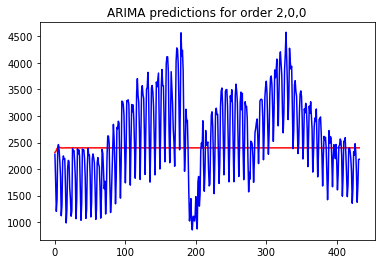

In [102]:
plt.title("ARIMA predictions for order 2,0,0")
plt.plot(range(0,len(predictions)),predictions,color="red")
plt.plot(range(0,len(predictions)),y_plot,color="blue")
plt.show()

In [107]:
#Arima Model
arima_211 = ARIMA(df,order=(2,1,1)).fit()
predictions_211 = arima_211.predict(start="9/14/2014",end="8/19/2020")
info_content(arima_211)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Akaike Information Criterion : 32063.890055177108
Schwarz Bayesian Criterion : 32086.612604887352
Bayesian Information Criteria : 32072.199675513875
Absolute Error of the arma model : 340.9734125674796
Root Squared Error of the arma model : 396.9271594277985


In [115]:
evaluate(predictions_211,y)

Absolute Error of the arma model : 340.9734125674796
Root Squared Error of the arma model : 396.9271594277985


In [106]:
df.head(1)


,First_visits
Date,
9/14/2014,1430


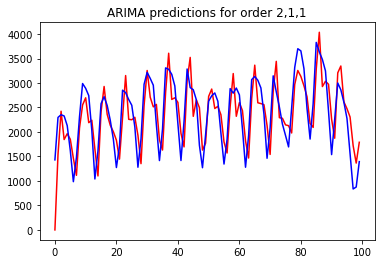

In [116]:
plt.title("ARIMA predictions for order 2,1,1")
plt.plot(range(0,100),predictions_211[0:100],color="red")
plt.plot(range(0,100),y[:100],color="blue")
plt.show()

In [111]:
import os

'D:\\Jupyter notebook\\125156003-Time_Series\\Untitled Folder 1'